In [96]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
from sklearn.cluster import KMeans

In [97]:
df= pd.read_csv('/Users/praga/Downloads/data/steam-200k.csv',header=None, index_col=None, names=['UserID', 'Game', 'Action', 'Hours', 'Other'])
df.head(10)

,UserID,Game,Action,Hours,Other
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0
5,151603712,Spore,play,14.9,0
6,151603712,Fallout New Vegas,purchase,1.0,0
7,151603712,Fallout New Vegas,play,12.1,0
8,151603712,Left 4 Dead 2,purchase,1.0,0
9,151603712,Left 4 Dead 2,play,8.9,0


In [98]:
df.loc[df['Action'] == 'play'].describe()

,UserID,Hours,Other
count,7.048900e+04,70489.000000,70489.0
mean,1.058812e+08,48.878063,0.0
std,7.150365e+07,229.335236,0.0
min,5.250000e+03,0.100000,0.0
25%,4.934256e+07,1.000000,0.0
50%,9.169067e+07,4.500000,0.0
75%,1.556738e+08,19.100000,0.0
max,3.099031e+08,11754.000000,0.0


In [99]:
df['Action'].value_counts()

purchase    129511
play         70489
Name: Action, dtype: int64

Lets consider the person with UserID = 151603712

In [100]:
user1=df[df['UserID']==151603712]
user1

,UserID,Game,Action,Hours,Other
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0
5,151603712,Spore,play,14.9,0
6,151603712,Fallout New Vegas,purchase,1.0,0
7,151603712,Fallout New Vegas,play,12.1,0
8,151603712,Left 4 Dead 2,purchase,1.0,0
9,151603712,Left 4 Dead 2,play,8.9,0


In [101]:
len(user1['Game'].unique())

40

This person has bought 40 games.

Now lets check if this person who bought the game also played all the games he bought.

In [102]:
values = user1.groupby(['UserID', 'Action']).size()
values.head()

UserID     Action  
151603712  play        26
           purchase    40
dtype: int64

Of the 40 he has purchased, he has played only 26 of them.

In [103]:
values = df.groupby(['UserID', 'Action']).size()
values.head(11)

UserID  Action  
5250    play         6
        purchase    21
76767   play        20
        purchase    36
86540   play        15
        purchase    82
103360  purchase    10
144736  play         1
        purchase     8
181212  play         2
        purchase    12
dtype: int64

This gives the information for some of the users on their purchase and play actions

In [104]:
user1_play=user1[user1['Action']=='play']
user1_play['Hours'].sum()

439.90000000000003

The user with ID=151603712 has played for 439.9 hours

In [105]:
df_play=df[df['Action']=='play']

user=list(df['UserID'].unique())
hours={}
for user in user:
    user1=df_play[df_play['UserID']==user]
    hour=user1['Hours'].sum()
    hours[user]=hour
    


In [106]:
hours

{64350487: 34.49999999999999,
 179044354: 1.4,
 194800299: 0.9,
 284164106: 0.5,
 234749963: 1193.0,
 27099151: 0.4,
 240058387: 0.0,
 177831964: 1.0,
 300449823: 3.4,
 94229851: 230.1,
 271646756: 0.2,
 159842342: 5.8,
 165216297: 3.6,
 195559468: 0.1,
 60424237: 5.1,
 69009454: 1143.5,
 84738098: 12.0,
 46115507: 0.4,
 251920440: 17.4,
 47644729: 1.1,
 33362395: 1445.0,
 29491264: 0.3,
 31162433: 176.20000000000002,
 289734724: 269.0,
 27060918: 0.0,
 57770056: 848.8,
 304971849: 21.2,
 147619919: 5.3,
 115567288: 435.7,
 254836819: 0.3,
 94994519: 0.5,
 4325465: 0.6,
 270303324: 2.8,
 70778973: 2859.3,
 269058144: 6.2,
 178290786: 8.1,
 172452539: 1.3,
 124878949: 364.2,
 300187751: 1.0,
 122847338: 176.0,
 198901867: 105.0,
 142803056: 1.5,
 194969717: 1.0,
 93290614: 1760.0,
 115632831: 1107.8,
 141197436: 29.0,
 234684541: 0.2,
 176750719: 0.3,
 294715521: 0.2,
 100728962: 73.0,
 154817899: 707.5,
 102219798: 0.5,
 210905793: 0.0,
 58217836: 521.9000000000001,
 70844556: 1171.8,


In [107]:
hours[151603712]

439.90000000000003

The 'hours' dictionary gives information on how many hours each user played the games they bought.

In [108]:
print("Number of games : {0}".format(len(df.Game.unique())))
print("Number of users : {0}".format(len(df.UserID.unique())))
print("Number of total purchases : {0}".format(len(df.loc[df['Action'] == 'purchase'])))
print("Number of total plays infos : {0}".format(len(df.loc[df['Action'] == 'play'])))

Number of games : 5155
Number of users : 12393
Number of total purchases : 129511
Number of total plays infos : 70489


In [109]:
print(70489/float(129511))

0.544270370857


It seems only half the games purchased are being played.

## Game and Users Analysis

In [110]:
nb_games = 5155
df_purchase = df.loc[df['Action'] == 'purchase']
purchased_times = df_purchase.groupby('Game')['Game'].agg('count').sort_values(ascending=False)
purchased_times = pd.DataFrame({'Game': purchased_times.index, 'Times_Purchased': purchased_times.values})[0:nb_games]

In [111]:
purchased_times.head(7)

,Game,Times_Purchased
0,Dota 2,4841
1,Team Fortress 2,2323
2,Unturned,1563
3,Counter-Strike Global Offensive,1412
4,Half-Life 2 Lost Coast,981
5,Counter-Strike Source,978
6,Left 4 Dead 2,951


Dota2 is the most purchased game.

In [112]:
purchased_times.tail(6)

,Game,Times_Purchased
5149,Rift Ascended Edition,1
5150,Riding Star,1
5151,Ride! Carnival Tycoon,1
5152,Don Bradman Cricket 14,1
5153,Rex Nebular and the Cosmic Gender Bender,1
5154,007 Legends,1


These are some of the least purchased games.

In [113]:
purchased_times[purchased_times['Times_Purchased']==1].shape[0]

1170

There are 1170 games which have been purchased only once.

In [114]:
df_play = df.loc[df['Action'] == 'play']
hours_played = df_play.groupby('Game')['Hours'].agg(np.sum).sort_values(ascending=False)
hours_played = pd.DataFrame({'game': hours_played.index, 'hours_played': hours_played.values})[0:nb_games]
hours_played.head()

,game,hours_played
0,Dota 2,981684.6
1,Counter-Strike Global Offensive,322771.6
2,Team Fortress 2,173673.3
3,Counter-Strike,134261.1
4,Sid Meier's Civilization V,99821.3


As expected , Dota 2 is also the highest played in terms of hours too.

In [115]:
hours_played.describe()

,hours_played
count,3600.000000
mean,957.046056
std,17930.737469
min,0.100000
25%,3.100000
50%,15.100000
75%,97.575000
max,981684.600000


In [116]:
hours_played.tail()

,game,hours_played
3595,A-Train 8,0.1
3596,Shan Gui,0.1
3597,Hyper Fighters,0.1
3598,Diamond Dan,0.1
3599,Guardians of Orion,0.1


In [117]:
hours_played[hours_played['hours_played']==0.1].shape[0]

56

There are 56 games which have been played for only 0.1 hours.

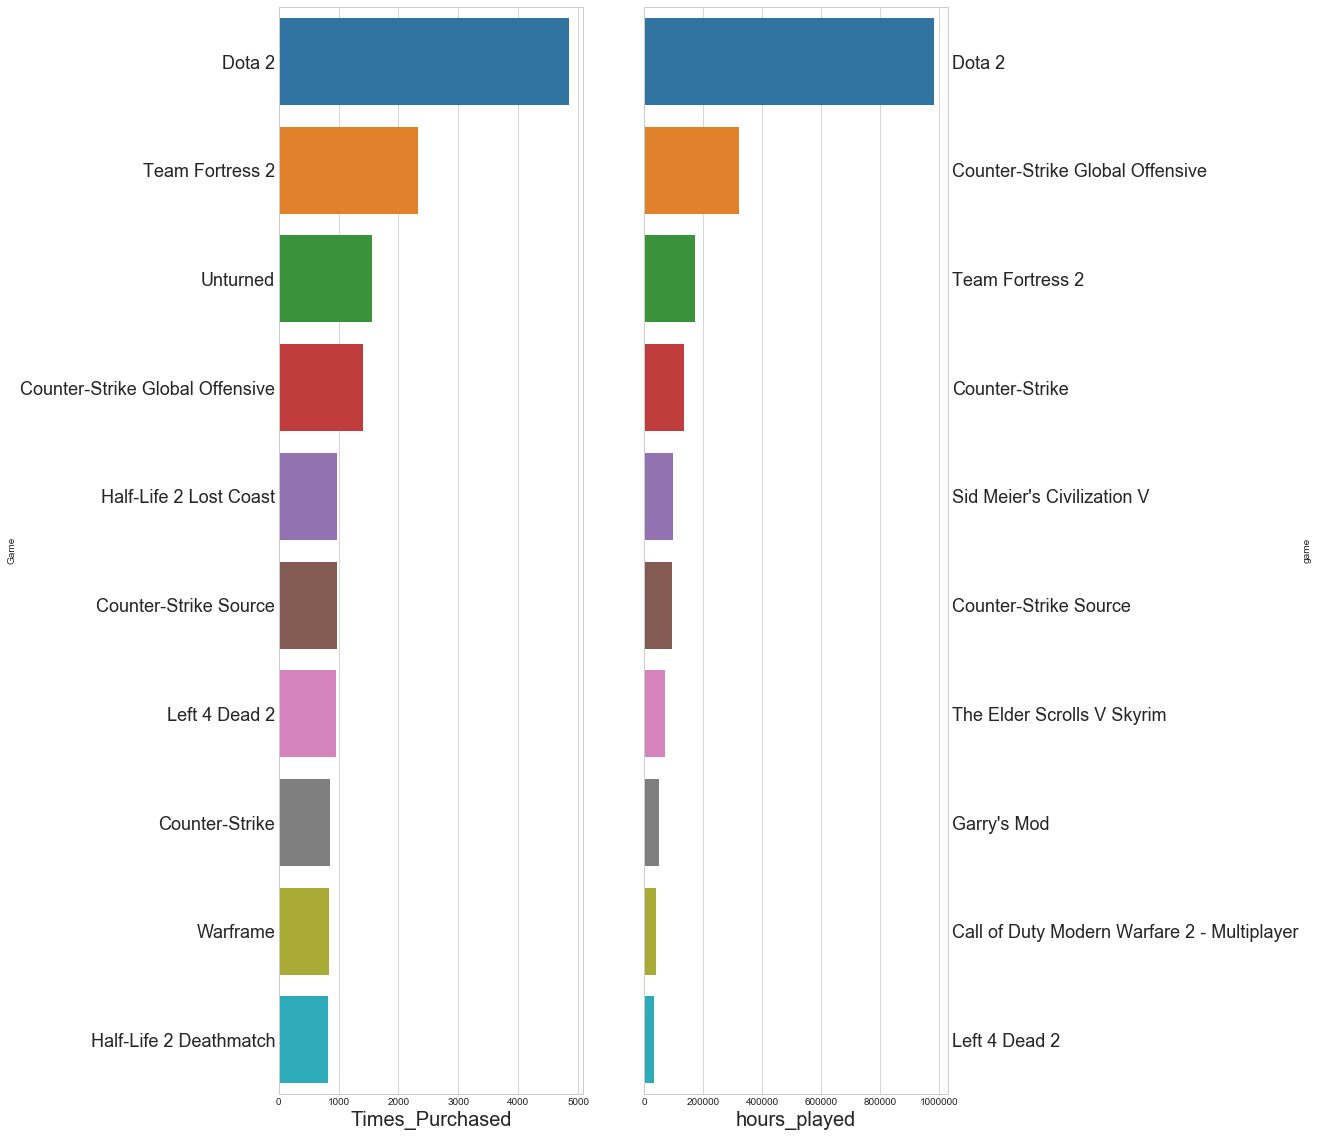

In [118]:
fig, ax =plt.subplots(1,2,figsize=(12,20))

sns.barplot(y = 'Game', x = 'Times_Purchased', data = purchased_times[0:10], ax=ax[0])
sns.barplot(y = 'game', x = 'hours_played', data = hours_played[0:10], ax=ax[1])


ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
for i in range(0,2):
    ax[i].tick_params(axis='y', labelsize=18)
    ax[i].xaxis.label.set_size(20)

### Analysis of top 15 players

In [119]:
top = 15
user_counts = df.groupby('UserID')['Hours'].agg(np.sum).sort_values(ascending=False)[0:top]
user_counts = pd.DataFrame({'UserID': user_counts.index, 'Hours': user_counts.values})

In [120]:
user_counts #total hours spent purchasing and playing

,Hours,UserID
0,11908.7,10599862
1,11755.0,73017395
2,10863.2,100630947
3,10751.1,26762388
4,9826.2,48798067
5,9718.3,43684632
6,9642.0,153382649
7,9444.6,52731290
8,8242.1,14544587
9,8179.9,42935819


These are the top 15 users

In [121]:
mask = df['UserID'].isin(user_counts['UserID'])
df_infos_user = df.loc[mask].loc[df['Action'] == 'play']

In [122]:
df_infos_user

,UserID,Game,Action,Hours,Other
16791,57433226,Counter-Strike Source,play,3013.0,0
16793,57433226,Counter-Strike Global Offensive,play,2508.0,0
16795,57433226,Garry's Mod,play,1371.0,0
16797,57433226,Rust,play,534.0,0
16799,57433226,Grand Theft Auto V,play,114.0,0
16801,57433226,H1Z1,play,81.0,0
16803,57433226,PAYDAY 2,play,72.0,0
16805,57433226,DayZ,play,13.1,0
16807,57433226,Team Fortress 2,play,9.0,0
16809,57433226,Left 4 Dead 2,play,8.6,0


In [123]:
hours_played = df_infos_user.groupby('Game')['Hours'].agg(np.sum).sort_values(ascending=False)
hours_played = pd.DataFrame({'game': hours_played.index, 'hours_played': hours_played.values})[0:nb_games]

hours_played

,game,hours_played
0,Dota 2,27407.4
1,Sid Meier's Civilization V,13295.0
2,Team Fortress 2,12073.9
3,Counter-Strike Global Offensive,8827.2
4,Counter-Strike Source,6365.4
5,Mount & Blade Warband,4967.3
6,Baldur's Gate II Enhanced Edition,3970.0
7,Football Manager 2014,3382.0
8,Baldur's Gate Enhanced Edition,2630.0
9,Football Manager 2015,2576.0


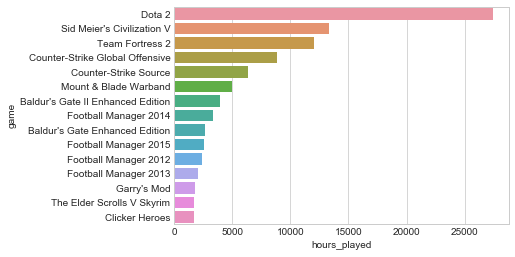

In [124]:
sns.barplot(y = 'game', x = 'hours_played', data = hours_played[0:15])

The top 15 players play these games.

### Analysis of top 15 games

In [125]:
nb_top_games = 15
hours_played = df_play.groupby('Game')['Hours'].agg(np.sum).sort_values(ascending=False)
top_played_games = pd.DataFrame({'game': hours_played.index, 'hours_played': hours_played.values})[0:nb_top_games]
top_played_games

,game,hours_played
0,Dota 2,981684.6
1,Counter-Strike Global Offensive,322771.6
2,Team Fortress 2,173673.3
3,Counter-Strike,134261.1
4,Sid Meier's Civilization V,99821.3
5,Counter-Strike Source,96075.5
6,The Elder Scrolls V Skyrim,70889.3
7,Garry's Mod,49725.3
8,Call of Duty Modern Warfare 2 - Multiplayer,42009.9
9,Left 4 Dead 2,33596.7


In [126]:
mask = df['Game'].isin(top_played_games['game'])

df_infos_user = df.loc[mask].loc[df['Action'] == 'play'][['Hours', 'Game']]
df_infos_user

,Hours,Game
1,273.0,The Elder Scrolls V Skyrim
9,8.9,Left 4 Dead 2
19,2.8,Team Fortress 2
43,0.5,Dota 2
49,0.1,Garry's Mod
67,2.3,Dota 2
73,58.0,The Elder Scrolls V Skyrim
75,22.0,Sid Meier's Civilization V
97,2.3,Counter-Strike Global Offensive
111,0.1,Team Fortress 2


This dataset tells which users played the top 15 games and for how much time individually.

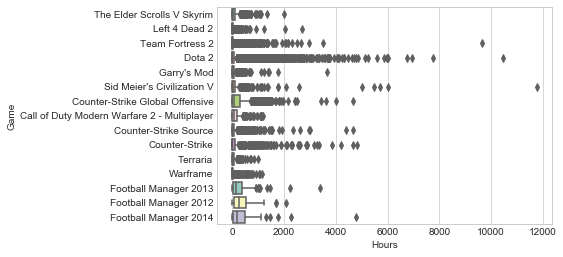

In [127]:
sns.set_style("whitegrid")
sns.boxplot(x="Hours", y="Game", data=df_infos_user, palette="Set3")

As we can see, there are some games staying quite close to the mean played games, whereas some others like FM or Civilization have some vert extremal played times.

## User Classification

In this we will try to find some clusters for users, to determine profile of gamers. To do so, we will try to use :

-  Nb Purchased Games vs Hours Played
-  Nb Played Games vs Hours Played
-  Nb Actions vs Hours Played

#### Nb Purchased Games vs Hours Played

In [128]:
df_purchased_games = df.loc[df['Action'] == 'purchase']
df_played_games = df.loc[df['Action'] == 'play']

In [129]:
#the number of games a user has bought
user_counts = df_purchased_games.groupby('UserID')['UserID'].agg('count').sort_values(ascending=False)
#the number of hours he has played 
hours_played = df_played_games.groupby('UserID')['Hours'].agg(np.sum).sort_values(ascending=False)

In [130]:
user_df_purchased_games = pd.DataFrame({'UserID': user_counts.index, 'nb_purchased_games': user_counts.values})
user_df_hours_played = pd.DataFrame({'UserID': hours_played.index, 'hours_played': hours_played.values})

In [131]:
user_df_purchased_games.head()

,UserID,nb_purchased_games
0,62990992,1075
1,33865373,783
2,30246419,766
3,58345543,667
4,76892907,597


In [132]:
user_df_hours_played.head()

,UserID,hours_played
0,73017395,11754.0
1,10599862,11651.7
2,100630947,10853.2
3,26762388,10470.1
4,153382649,9640.0


In [133]:
data = pd.merge(user_df_purchased_games, user_df_hours_played, on='UserID')
data.head()


,UserID,nb_purchased_games,hours_played
0,62990992,1075,5724.8
1,33865373,783,2274.4
2,30246419,766,1219.7
3,58345543,667,1374.9
4,76892907,597,2731.3


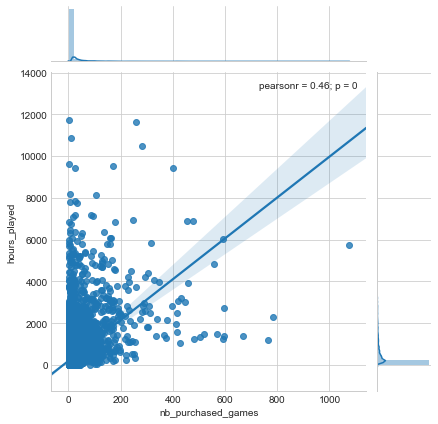

In [134]:
sns.jointplot(x="nb_purchased_games", y="hours_played", data=data , kind="reg")

It's hard to find a pattern in this.

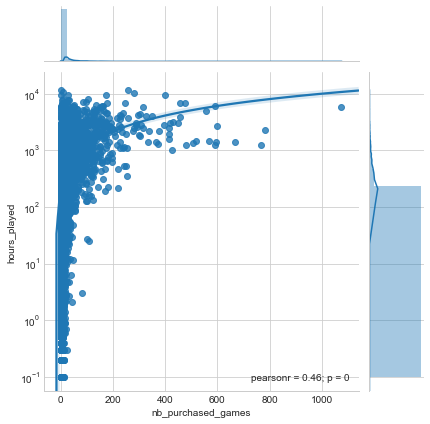

In [135]:
g = sns.jointplot(x="nb_purchased_games", y="hours_played", data=data, kind="reg")
ax = g.ax_joint
ax.set_yscale('log')
g.ax_marg_y.set_yscale('log')
g

#### Nb Played Games vs Hours Played

In [136]:
hours_played = df_played_games.groupby('UserID')['Hours'].agg(np.sum).sort_values(ascending=False)
user_counts = df_played_games.groupby('UserID')['UserID'].agg('count').sort_values(ascending=False)

user_df_played_games = pd.DataFrame({'UserID': user_counts.index, 'nb_played_games': user_counts.values})
user_df_hours_played = pd.DataFrame({'UserID': hours_played.index, 'hours_played': hours_played.values})

In [137]:
user_df_played_games.head()

,UserID,nb_played_games
0,62990992,498
1,11403772,314
2,138941587,299
3,47457723,298
4,49893565,297


In [138]:
user_df_hours_played.head()

,UserID,hours_played
0,73017395,11754.0
1,10599862,11651.7
2,100630947,10853.2
3,26762388,10470.1
4,153382649,9640.0


In [139]:
data = pd.merge(user_df_played_games, user_df_hours_played, on='UserID')
data.head()

,UserID,nb_played_games,hours_played
0,62990992,498,5724.8
1,11403772,314,6009.9
2,138941587,299,3011.2
3,47457723,298,4844.3
4,49893565,297,6891.9


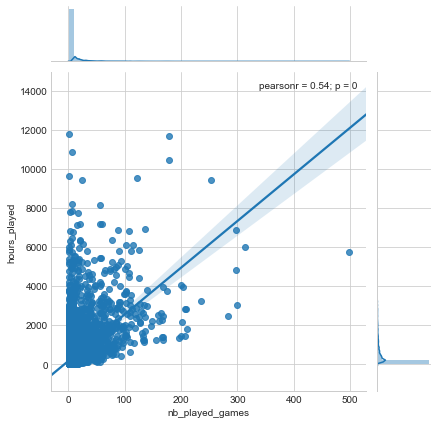

In [140]:
sns.jointplot(x="nb_played_games", y="hours_played", data=data , kind="reg")

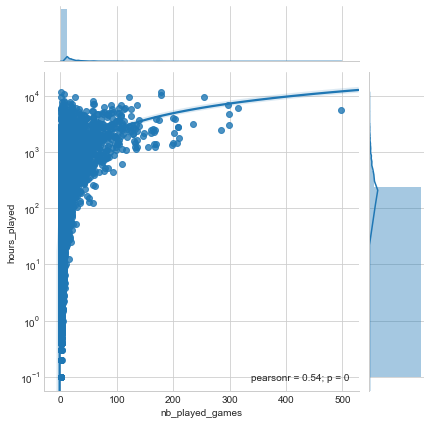

In [141]:
g = sns.jointplot(x="nb_played_games", y="hours_played", data=data, kind="reg")
ax = g.ax_joint
ax.set_yscale('log')
g.ax_marg_y.set_yscale('log')
g

This is much better in plotting the relation. But there is too much noise in the dataset. We should try to eliminate those absurd values to focus more precisely on the core of the points.

#### Nb Actions vs Hours Played

In [142]:
temp = pd.merge(user_df_purchased_games, data, on='UserID')

temp.head()

,UserID,nb_purchased_games,nb_played_games,hours_played
0,62990992,1075,498,5724.8
1,33865373,783,166,2274.4
2,30246419,766,135,1219.7
3,58345543,667,166,1374.9
4,76892907,597,98,2731.3


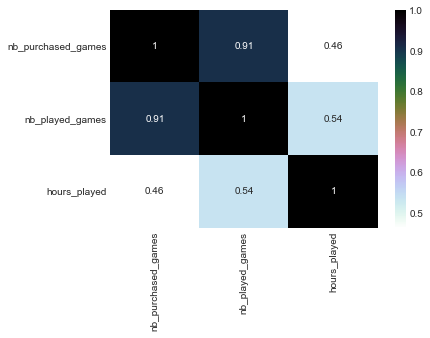

In [143]:
del temp['UserID'] #don't need this for k mean
sns.heatmap(temp.corr(),annot=True,cmap='cubehelix_r') 

We have a strong correlation between the **number of played games** and the **number of purchased games**.

## K-means Clustering

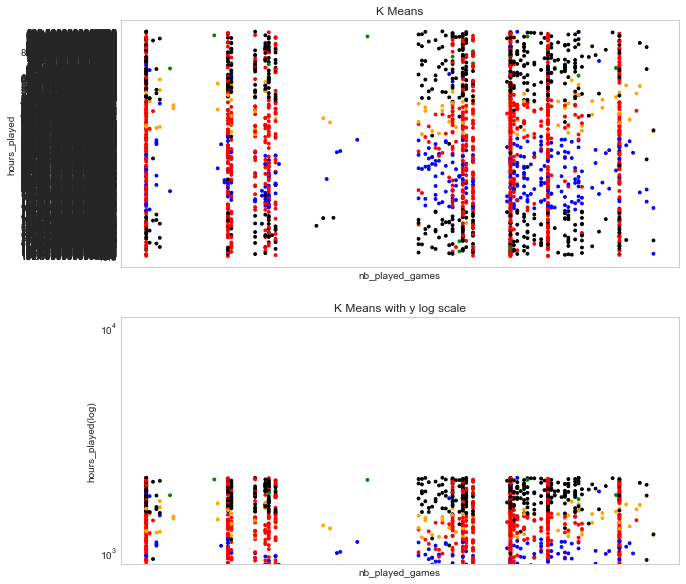

In [164]:
temp = data.copy()
del temp['UserID'] #don't need this for k mean

N_CLUSTERS = 5
train_data = temp.as_matrix()
# Using sklearn
km = KMeans(n_clusters=N_CLUSTERS)
km.fit(train_data)
# Get cluster assignment labels
labels = km.labels_ # 0 to n_clusters-1
# Format results as a DataFrame

LABEL_COLOR_MAP = {0 : 'red',
                   1 : 'blue',
                   2 : 'green',
                   3 : 'black',
                   4 : 'orange'#,
                   #5 : 'pink'
                  }

label_color = [LABEL_COLOR_MAP[l] for l in labels]


fig, ax =plt.subplots(2,1,figsize=(10,10))
ax[0].scatter(data[['nb_played_games']][0:2200], data[['hours_played']][0:2200], c=label_color, s=8, marker='o')
ax[0].set_xlabel('nb_played_games')
ax[0].set_ylabel('hours_played')
ax[0].set_title('K Means')
ax[0].grid(False)
ax[0].tick_params(axis='x',which='both',bottom=False, top=False,labelbottom=False)
ax[0].tick_params(axis='y',which='both',bottom=False,top=False,labelbottom=False)


ax[1].scatter(data[['nb_played_games']][0:2200], data[['hours_played']][0:2200], c=label_color, s=8, marker='o')
ax[1].set_xlabel('nb_played_games')
ax[1].set_ylabel('hours_played(log)')
ax[1].set_title('K Means with y log scale')
ax[1].grid(False)
ax[1].tick_params(axis='x',which='both',bottom=False, top=False,labelbottom=False)
ax[1].tick_params(axis='y',which='both',bottom=False,top=False,labelbottom=False)

ax[1].set_yscale('log')

